# Can we predict recessions or equity market downturns given publicly available macroeconomic data?

In [63]:
# Project Inspiration 
# https://medium.com/@romanm111987/predicting-stock-market-crashes-with-statistical-machine-learning-techniques-and-neural-networks-b756d9b48497
# https://github.com/roman807/Predicting-Stock-Market-Crashes

# Clean Data

In [64]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Align Data

In [65]:
# First batch of data

import pandas as pd

SP500 = pd.read_csv('Data/SP500.csv')
T10T3 = pd.read_csv('Data/103.csv')
uRate = pd.read_csv('Data/Unrate.csv')
nfci = pd.read_csv('Data/nfci.csv')
GDP = pd.read_csv('Data/GDP.csv')

# Second batch of data
USDindex = pd.read_csv('Data/USDIndex.csv')
ManufacturingConfidence = pd.read_csv('Data/ManufacturingConfidence.csv')
HousePriceIndex = pd.read_csv('Data/HousePriceIndex.csv')
ConsumerSentiment = pd.read_csv('Data/ConsumerSentiment.csv')
PeopleOutputPerHour = pd.read_csv('Data/PeopleOutputPerHour.csv')
GS10 = pd.read_csv('Data/GS10.csv')
FEDFUNDS = pd.read_csv('Data/FEDFUNDS.csv')
USNIM = pd.read_csv('Data/USNIM.csv')
govtToGDP = pd.read_csv('Data/govtToGDP.csv')
CorporateProfits = pd.read_csv('Data/CorporateProfits.csv')
VIX = pd.read_csv('Data/VIX.csv')

# Annoying to integrate all these right now
#highYield = pd.read_csv('Data/highYield.csv')
#highYield = highYield.iloc[1:]
#BBB = pd.read_csv('Data/BBB.csv')
#BBB = BBB.iloc[1:]
#IG = pd.read_csv('Data/IG.csv')
#IG = IG.iloc[1:]

# Add these
# https://www.quandl.com/data/MULTPL/SHILLER_PE_RATIO_MONTH-Shiller-PE-Ratio-by-Month
# https://fred.stlouisfed.org/series/USREC
# https://fred.stlouisfed.org/series/M1
# https://fred.stlouisfed.org/series/M2
# https://fred.stlouisfed.org/series/MABMM301USM189S
# https://research.stlouisfed.org/
# https://fred.stlouisfed.org/series/CSUSHPISA
# https://fred.stlouisfed.org/series/USSLIND
# Add one year and three year performance to S&P 
# https://fred.stlouisfed.org/series/TEDRATE
# https://fred.stlouisfed.org/series/CUSR0000SAC
#  https://fred.stlouisfed.org/series/DEXJPUS
# https://fred.stlouisfed.org/series/PERMIT
# https://fred.stlouisfed.org/series/T10YFFM
# https://www.quandl.com/data/FRED/NAPMPI-ISM-Manufacturing-Production-Index
# https://fred.stlouisfed.org/series/PAYEMS
# https://www.quandl.com/data/FRED/NAPM-ISM-Manufacturing-PMI-Composite-Index

In [66]:
ourData = [SP500, T10T3, uRate, nfci, GDP, USDindex,
          ManufacturingConfidence, HousePriceIndex, ConsumerSentiment,
          PeopleOutputPerHour, GS10, FEDFUNDS, USNIM, govtToGDP, CorporateProfits, VIX]#, highYield, BBB, IG]
dataName = ['SP500', 'T10T3', 'uRate', 'nfci', 'GDP', 'USDIndex',
           'ManufacturingConfidence', 'HousePriceIndex', 'ConsumerSentiment',
          'PeopleOutputPerHour', 'GS10', 'FEDFUNDS', 'USNIM', 'govtToGDP', 'CorporateProfits', 'VIX']#, 'highYield', 'BBB', 'IG']

In [67]:
maxData = 0
maxDataType = 'xyz'
maxYear = 0
maxYearType = 'xyz'

for i in range(0, len(ourData)):
    start = '/'
    end = '/'
    
    date1 = ourData[i]['Date'][0]
    
    thisYear = int(date1[-4:])
    #print(thisYear, dataName[i])
    
    if thisYear > maxYear:
        maxYear = thisYear
        maxYearType = dataName[i]
    
    date2 = ourData[i]['Date'][1]
    #print(date2)
    #print('Month', date2.split('/')[0])
    #print((date2.split(start))[1].split(end)[0])
    #print(dataName[i], ":", int(date2.split('/')[0]) - int(date1.split('/')[0]))
    if (int(date2.split('/')[0]) - int(date1.split('/')[0])) > maxData:
        maxData = int(date2.split('/')[0]) - int(date1.split('/')[0])
        maxDataType = dataName[i]
print(maxDataType, "data reporting is", maxData, "months")
print(maxYear, "is the last year in the data, and it is from", maxYearType)

GDP data reporting is 3 months
1990 is the last year in the data, and it is from VIX


In [68]:
# Create year column for all data

for i in range(0, len(ourData)):
    # Why can't we get year to match up to the column length
    yearList = [0] * len(ourData[i])
    #print(len(yearList))
    for j in range(0, len(yearList)):        
        dateValue = ourData[i]['Date'][j]        
        thisDate = int(dateValue[-4:])
        yearList[j] = thisDate
    ourData[i]['Year'] = yearList

In [69]:
# Filter data based on the max year

for i in range(0, len(ourData)):
    ourData[i]['Year'].astype(float)
    ourData[i]['Year'] = ourData[i][ourData[i]['Year'] >= maxYear]  

In [70]:
# Drop nulls 
for i in range(0, len(ourData)):
    ourData[i] = ourData[i].dropna()

In [72]:
# Check data outputs
# for i in range(0, len(ourData)):
    # print(ourData[i].head())

In [73]:
# We now need to filter out all data before 1982

SP500 = ourData[0]
T10T3 = ourData[1]
uRate = ourData[2]
nfci = ourData[3]
GDP = ourData[4]
USDindex = ourData[5]
ManufacturingConfidence = ourData[6]
HousePriceIndex = ourData[7]
ConsumerSentiment = ourData[8]           
PeopleOutputPerHour = ourData[9]
GS10 = ourData[10]
FEDFUNDS = ourData[11]
USNIM = ourData[12]
govtToGDP = ourData[13]
CorporateProfits = ourData[14]
VIX = ourData[15]
#highYield = ourData[16]
#BBB = ourData[17]
#IG = ourData[18]

In [74]:
ourData = [SP500, T10T3, uRate, nfci, GDP, USDindex,
          ManufacturingConfidence, HousePriceIndex, ConsumerSentiment,
          PeopleOutputPerHour, GS10, FEDFUNDS, USNIM, govtToGDP, CorporateProfits, VIX]#, highYield, BBB, IG]

dataName = ['SP500', 'T10T3', 'uRate', 'nfci', 'GDP', 'USDIndex',
           'ManufacturingConfidence', 'HousePriceIndex', 'ConsumerSentiment',
          'PeopleOutputPerHour', 'GS10', 'FEDFUNDS', 'USNIM', 'govtToGDP', 'CorporateProfits', 'VIX']#, 'highYield', 'BBB', 'IG']

smallestData = len(ourData[0])
smallestDataName = dataName[0]

for i in range(0, len(ourData)):
    # print(len(ourData[i]), dataName[i])
    if len(ourData[i]) < smallestData:
        smallestData = len(ourData[i]) 
        smallestDataName = dataName[i]
print(smallestData, smallestDataName)

116 GDP


In [75]:
# Get the dates lined up based on the smallest piece of data
#dataGathering = [0] * len(GDP)
w, h = 17, len(GDP); # This has to be based off the length of the shortest file
results = [[0 for x in range(w)] for y in range(h)] 

newData = [SP500, T10T3, uRate, nfci, USDindex,
          ManufacturingConfidence, HousePriceIndex, ConsumerSentiment,
          PeopleOutputPerHour, GS10, FEDFUNDS, USNIM, govtToGDP, CorporateProfits, VIX] 

In [76]:
# Results

# Need to add a new incrementer to position every time a new variable is added to the test files.
position1 = 0
position2 = 0
position3 = 0
position4 = 0

position5 = 0
position6 = 0
position7 = 0
position8 = 0

position9 = 0
position10 = 0
position11 = 0
position12 = 0

position13 = 0
position14 = 0
position15 = 0

for i in range(0, len(GDP)): # This has to be based off the length of the shortest file
    results[i][0] = GDP['Date'].iloc[i]
    results[i][1] = round(GDP['GDP'].iloc[i], 2)    
    if GDP['Date'].iloc[i][:2] == newData[0]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[0]['Date'].iloc[i][-4:]:
        results[i][2] = round(newData[0]['SP500'].iloc[i], 2)
        # print(GDP['Date'].iloc[i])
        # print(newData[0]['Date'].iloc[i])
    else:
        while position1 <= len(newData[0]):
            if (GDP['Date'].iloc[i][:2] == newData[0]['Date'].iloc[position1][:2]) and (GDP['Date'].iloc[i][-4:] == newData[0]['Date'].iloc[position1][-4:]):
                results[i][2] = round(newData[0]['SP500'].iloc[position1], 2)
                # print(GDP['Date'].iloc[i])
                # print(newData[0]['Date'].iloc[position1])
                break
            else:
                position1 = position1 + 1
    if GDP['Date'].iloc[i][:2] == newData[1]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[1]['Date'].iloc[i][-4:]:
        if newData[1]['T10Y3M'].iloc[position2] == 0:
                results[i][3] = round(newData[1]['T10Y3M'].iloc[position2 + 1], 2)
                # print(GDP['Date'].iloc[i])
                # print(newData[1]['Date'].iloc[position2])
        else:
            results[i][3] = round(newData[1]['T10Y3M'].iloc[i], 2)
    else:
        while position2 <= len(newData[1]):
            if (GDP['Date'].iloc[i][:2] == newData[1]['Date'].iloc[position2][:2]) and (GDP['Date'].iloc[i][-4:] == newData[1]['Date'].iloc[position2][-4:]):
                # Test if newData[1]['T10Y3M'].iloc[position2] == 0
                # if so, take the next one from it
                if newData[1]['T10Y3M'].iloc[position2] == 0:
                    results[i][3] = round(newData[1]['T10Y3M'].iloc[position2 + 1], 2)
                    # print(GDP['Date'].iloc[i])
                    # print(newData[1]['Date'].iloc[position2])
                else:
                    results[i][3] = round(newData[1]['T10Y3M'].iloc[position2], 2)
                    # print(GDP['Date'].iloc[i])
                    # print(newData[1]['Date'].iloc[position2])
                break
            else:
                position2 = position2 + 1
    if GDP['Date'].iloc[i][:2] == newData[2]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[2]['Date'].iloc[i][-4:]:
        results[i][4] = round(newData[2]['UNRATE'].iloc[i], 2)
    else:
        while position3 <= len(newData[2]):
            if (GDP['Date'].iloc[i][:2] == newData[2]['Date'].iloc[position3][:2]) and (GDP['Date'].iloc[i][-4:] == newData[2]['Date'].iloc[position3][-4:]):
                results[i][4] = round(newData[2]['UNRATE'].iloc[position3], 2)
                # print(GDP['Date'].iloc[i])
                # print(newData[2]['Date'].iloc[position3])
                break
            else:
                position3 = position3 + 1
    if GDP['Date'].iloc[i][:2] == newData[3]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[3]['Date'].iloc[i][-4:]:
        results[i][5] = round(newData[3]['NFCI'].iloc[i], 2)
    else:
        while position4 <= len(newData[3]):
            if (GDP['Date'].iloc[i][:2] == newData[3]['Date'].iloc[position4][:2]) and (GDP['Date'].iloc[i][-4:] == newData[3]['Date'].iloc[position4][-4:]):
                results[i][5] = round(newData[3]['NFCI'].iloc[position4], 2)
                # print(GDP['Date'].iloc[i])
                # print(newData[3]['Date'].iloc[position4])
                break
            else:
                position4 = position4 + 1    
    if GDP['Date'].iloc[i][:2] == newData[4]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[4]['Date'].iloc[i][-4:]:
        if newData[4]['USDindex'].iloc[i] == '.':
            results[i][6] = newData[4]['USDindex'].iloc[position5 + 1]
            # print(GDP['Date'].iloc[i])
            # print(newData[4]['Date'].iloc[i])
        else:
            results[i][6] = newData[4]['USDindex'].iloc[position5]
    else:
        while position5 <= len(newData[4]):
            if (GDP['Date'].iloc[i][:2] == newData[4]['Date'].iloc[position5][:2]) and (GDP['Date'].iloc[i][-4:] == newData[4]['Date'].iloc[position5][-4:]):
                # Test if newData[4]['USDindex'].iloc[position5] == '.'
                # if so, take the next one from it
                if newData[4]['USDindex'].iloc[position5] == '.':
                    results[i][6] = newData[4]['USDindex'].iloc[position5 + 1]
                else:
                    results[i][6] = newData[4]['USDindex'].iloc[position5]                    
                # print(GDP['Date'].iloc[i])
                # print(newData[4]['Date'].iloc[position5])
                break 
            else:
                position5 = position5 + 1
    if GDP['Date'].iloc[i][:2] == newData[5]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[5]['Date'].iloc[i][-4:]:
        results[i][7] = round(newData[5]['ManufacturingConfidence'].iloc[i], 2)
    else:
        while position6 <= len(newData[5]):
            if (GDP['Date'].iloc[i][:2] == newData[5]['Date'].iloc[position6][:2]) and (GDP['Date'].iloc[i][-4:] == newData[5]['Date'].iloc[position6][-4:]):
                results[i][7] = round(newData[5]['ManufacturingConfidence'].iloc[position6], 2)
                # print(GDP['Date'].iloc[i])
                # print(newData[5]['Date'].iloc[position6])
                break
            else:
                position6 = position6 + 1
    if GDP['Date'].iloc[i][:2] == newData[6]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[6]['Date'].iloc[i][-4:]:
        results[i][8] = round(newData[6]['HousePriceIndex'].iloc[i], 2)
    else:
        while position7 <= len(newData[6]):
            if (GDP['Date'].iloc[i][:2] == newData[6]['Date'].iloc[position7][:2]) and (GDP['Date'].iloc[i][-4:] == newData[6]['Date'].iloc[position7][-4:]):
                results[i][8] = round(newData[6]['HousePriceIndex'].iloc[position7], 2)
                # print(GDP['Date'].iloc[i])
                # print(newData[6]['Date'].iloc[position7])
                break
            else:
                position7 = position7 + 1
    if GDP['Date'].iloc[i][:2] == newData[7]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[7]['Date'].iloc[i][-4:]:
        results[i][9] = newData[7]['ConsumerSentiment'].iloc[i]
    else:
        while position8 <= len(newData[7]):
            if (GDP['Date'].iloc[i][:2] == newData[7]['Date'].iloc[position8][:2]) and (GDP['Date'].iloc[i][-4:] == newData[7]['Date'].iloc[position8][-4:]):
                results[i][9] = newData[7]['ConsumerSentiment'].iloc[position8]
                # print(GDP['Date'].iloc[i])
                # print(newData[7]['Date'].iloc[position8])
                break
            else:
                position8 = position8 + 1
    
    if GDP['Date'].iloc[i][:2] == newData[8]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[8]['Date'].iloc[i][-4:]:
        results[i][10] = newData[8]['PeopleOutputPerHour'].iloc[i]
    else:
        while position9 <= len(newData[8]):
            if (GDP['Date'].iloc[i][:2] == newData[8]['Date'].iloc[position9][:2]) and (GDP['Date'].iloc[i][-4:] == newData[8]['Date'].iloc[position9][-4:]):
                results[i][10] = newData[8]['PeopleOutputPerHour'].iloc[position9]
                # print(GDP['Date'].iloc[i])
                # print(newData[8]['Date'].iloc[position9])
                break
            else:
                position9 = position9 + 1
    
    if GDP['Date'].iloc[i][:2] == newData[9]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[9]['Date'].iloc[i][-4:]:
        results[i][11] = newData[9]['GS10'].iloc[i]
    else:
        while position10 <= len(newData[9]):
            if (GDP['Date'].iloc[i][:2] == newData[9]['Date'].iloc[position10][:2]) and (GDP['Date'].iloc[i][-4:] == newData[9]['Date'].iloc[position10][-4:]):
                results[i][11] = newData[9]['GS10'].iloc[position10]
                # print(GDP['Date'].iloc[i])
                # print(newData[9]['Date'].iloc[position10])
                break
            else:
                position10 = position10 + 1
    
    if GDP['Date'].iloc[i][:2] == newData[10]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[10]['Date'].iloc[i][-4:]:
        results[i][12] = newData[10]['FEDFUNDS'].iloc[i]
    else:
        while position11 <= len(newData[10]):
            if (GDP['Date'].iloc[i][:2] == newData[10]['Date'].iloc[position11][:2]) and (GDP['Date'].iloc[i][-4:] == newData[10]['Date'].iloc[position11][-4:]):
                results[i][12] = newData[10]['FEDFUNDS'].iloc[position11]
                # print(GDP['Date'].iloc[i])
                # print(newData[10]['Date'].iloc[position11])
                break
            else:
                position11 = position11 + 1
    
    if GDP['Date'].iloc[i][:2] == newData[11]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[11]['Date'].iloc[i][-4:]:
        results[i][13] = newData[11]['USNIM'].iloc[i]
    else:
        while position12 <= len(newData[11]):
            if (GDP['Date'].iloc[i][:2] == newData[11]['Date'].iloc[position12][:2]) and (GDP['Date'].iloc[i][-4:] == newData[11]['Date'].iloc[position12][-4:]):
                results[i][13] = newData[11]['USNIM'].iloc[position12]
                # print(GDP['Date'].iloc[i])
                # print(newData[11]['Date'].iloc[position12])
                break
            else:
                position12 = position12 + 1
    
    if GDP['Date'].iloc[i][:2] == newData[12]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[12]['Date'].iloc[i][-4:]:
        results[i][14] = newData[12]['GEXPND_GDP'].iloc[i] 
    else:
        while position13 <= len(newData[12]):
            if (GDP['Date'].iloc[i][:2] == newData[12]['Date'].iloc[position13][:2]) and (GDP['Date'].iloc[i][-4:] == newData[12]['Date'].iloc[position13][-4:]):
                results[i][14] = newData[12]['GEXPND_GDP'].iloc[position13]
                # print(GDP['Date'].iloc[i])
                # print(newData[12]['Date'].iloc[position13])
                break
            else:
                position13 = position13 + 1
    
    if GDP['Date'].iloc[i][:2] == newData[13]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[13]['Date'].iloc[i][-4:]:
        results[i][15] = newData[13]['CorporateProfits'].iloc[i]
    else:
        while position14 <= len(newData[13]):
            if (GDP['Date'].iloc[i][:2] == newData[13]['Date'].iloc[position14][:2]) and (GDP['Date'].iloc[i][-4:] == newData[13]['Date'].iloc[position14][-4:]):
                results[i][15] = newData[13]['CorporateProfits'].iloc[position14]
                # print(GDP['Date'].iloc[i])
                # print(newData[13]['Date'].iloc[position14])
                break
            else:
                position14 = position14 + 1
                
    if GDP['Date'].iloc[i][:2] == newData[14]['Date'].iloc[i][:2] and GDP['Date'].iloc[i][-4:] == newData[14]['Date'].iloc[i][-4:]:
        results[i][16] = newData[14]['VIX'].iloc[i]
    else:
        while position15 <= len(newData[14]):
            if (GDP['Date'].iloc[i][:2] == newData[14]['Date'].iloc[position15][:2]) and (GDP['Date'].iloc[i][-4:] == newData[14]['Date'].iloc[position15][-4:]):
                if newData[14]['VIX'].iloc[position15] == '.':
                    results[i][16] = newData[14]['VIX'].iloc[position15 + 2]
                else:
                    results[i][16] = newData[14]['VIX'].iloc[position15]
                # print(GDP['Date'].iloc[i])
                # print(newData[14]['Date'].iloc[position15])
                break
            else:
                position15 = position15 + 1

In [78]:
# results

In [79]:
finalData = pd.DataFrame(results)
finalData.columns = ['Date', 'GDP', 'SP500', 'T10T3', 'uRate', 'nfci', 'USDIndex',
           'ManufacturingConfidence', 'HousePriceIndex', 'ConsumerSentiment',
          'PeopleOutputPerHour', 'GS10', 'FEDFUNDS', 'USNIM', 'govtToGDP', 'CorporateProfits', 'VIX']

In [80]:
# 20% or a larger drawdown from last stock market index top
# Using S&P 500 due to US market data ease of gathering. US around 50% of MSCI indexes
# SP500

spDay = 0
spFirstDayOfQuarter = 0
spLastDayOfQuarter = 0
spMax = SP500['SP500'].iloc[0]
spMaxList = []
spNewMax = [] # 0 or 1
spBelowMax = [] # look at quarter end vs all time high
spQuarterReturn = []

spMaxQuarterDrawdown = []

# Something is still wrong with quarter max/min. Need to investigate
spQuarterMax = []
spQuarterMin = []
# need to figure out how to classify bear market

for i in range(1, len(finalData)):
    print(finalData['Date'].iloc[i])
    maxCheck = None
    while spDay <= len(SP500):
        if (finalData['Date'].iloc[i][:2] == SP500['Date'].iloc[spDay][:2]) and (finalData['Date'].iloc[i][-4:] == SP500['Date'].iloc[spDay][-4:]):
            print(SP500['SP500'].iloc[spDay])    
            spMaxList.append(spMax)
            if maxCheck:
                spNewMax.append(1)
            else:
                spNewMax.append(0)            
            #print((SP500['SP500'].iloc[spDay] / SP500['SP500'].iloc[spFirstDayOfQuarter]) - 1)
            spQuarterReturn.append(SP500['SP500'].iloc[spDay] / SP500['SP500'].iloc[spFirstDayOfQuarter] - 1)
            quarterMax = SP500['SP500'].iloc[spFirstDayOfQuarter]
            quarterMin = SP500['SP500'].iloc[spFirstDayOfQuarter]
            checkValue = SP500['SP500'].iloc[spFirstDayOfQuarter]
            for j in range(spFirstDayOfQuarter, spDay): 
                if SP500['SP500'].iloc[j] > quarterMax:
                    quarterMax = SP500['SP500'].iloc[j]
                if SP500['SP500'].iloc[j] < quarterMin:
                    quarterMin = SP500['SP500'].iloc[j]
                    checkValue = quarterMin / quarterMax - 1
            spQuarterMax.append(quarterMax)
            spQuarterMin.append(quarterMin)
            spMaxQuarterDrawdown.append(checkValue)
            spBelowMax.append((quarterMin / spMax) - 1)
            spFirstDayOfQuarter = spDay
            break
        else:
            spDay = spDay + 1
            if SP500['SP500'].iloc[spDay] > spMax:
                spMax = SP500['SP500'].iloc[spDay]
                maxCheck = True            
            #spQuarterMaxDrawdown

4/1/1990
338.700012
7/1/1990
359.540009
10/1/1990
314.940002
1/1/1991
326.450012
4/1/1991
371.299988
7/1/1991
377.920013
10/1/1991
389.200012
1/1/1992
417.26001
4/1/1992
404.230011
7/1/1992
412.880005
10/1/1992
416.290009
1/1/1993
435.380005
4/1/1993
450.299988
7/1/1993
449.01998899999995
10/1/1993
461.27999900000003
1/1/1994
465.44000199999994
4/1/1994
438.920013
7/1/1994
446.200012
10/1/1994
461.73999000000003
1/1/1995
459.10998499999994
4/1/1995
501.85000599999995
7/1/1995
547.090027
10/1/1995
581.719971
1/1/1996
620.72998
4/1/1996
653.72998
7/1/1996
675.880005
10/1/1996
689.080017
1/1/1997
737.01001
4/1/1997
759.6400150000001
7/1/1997
891.0300289999999
10/1/1997
955.409973
1/1/1998
975.0399779999999
4/1/1998
1108.150024
7/1/1998
1148.560059
10/1/1998
986.3900150000001
1/1/1999
1228.099976
4/1/1999
1293.719971
7/1/1999
1380.959961
10/1/1999
1282.810059
1/1/2000
1455.219971
4/1/2000
1505.969971
7/1/2000
1469.540039
10/1/2000
1436.22998
1/1/2001
1283.27002
4/1/2001
1145.869995
7/1/200

In [81]:
finalData = finalData.iloc[1:]

finalData['spHistoricalMax'] = spMaxList
finalData['spMaxAchieved'] = spNewMax
finalData['spBelowMax'] = spBelowMax
finalData['spQuarterPerformance'] = spQuarterReturn
finalData['QuarterMax'] = spQuarterMax
finalData['QuarterMin'] = spQuarterMin
finalData['spMaxQuarterDrawdown'] = spMaxQuarterDrawdown

In [82]:
gdpMove = []
spMove = []
gdpMoveQoverQ = [] # did gdp grow from the last quarter to the next one
gdpMoveYoverY = [] # did gdp grow from last year's quarter to this year's quarter

for i in range(1, len(finalData)):
    #print(finalData['Date'].iloc[i], 'GDP', finalData['GDP'].iloc[i] - finalData['GDP'].iloc[i - 1])
    if (finalData['GDP'].iloc[i] - finalData['GDP'].iloc[i - 1]) > 0.0:
        gdpMove.append(1)
    else:
        gdpMove.append(0)        
    #print(finalData['Date'].iloc[i], 'SP500', finalData['SP500'].iloc[i] - finalData['SP500'].iloc[i - 1])
    if (finalData['SP500'].iloc[i] - finalData['SP500'].iloc[i - 1]) > 0.0:
        spMove.append(1)
    else:
        spMove.append(0)
    if i >= 1:
        gdpMoveQoverQ.append((finalData['GDP'].iloc[i] / finalData['GDP'].iloc[i - 1]) - 1)
    if i >= 4:
        gdpMoveYoverY.append((finalData['GDP'].iloc[i] / finalData['GDP'].iloc[i - 4]) - 1)
        
finalData = finalData.iloc[1:]
        
#finalData['gdpMove'] = gdpMove
finalData['spMove'] = spMove

In [83]:
#finalData['GDP'].iloc[len(finalData) - 1] / (111.19 / 100)
gdpGrowth = pd.read_csv('Data/gdpGrowth.csv')

In [84]:
finalData['gdpGrowth'] = gdpGrowth['GDPgrowth']
finalData['gdpGrowth'].iloc[len(finalData) - 1] = 3.0

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [85]:
finalData

,Date,GDP,SP500,T10T3,uRate,nfci,USDIndex,ManufacturingConfidence,HousePriceIndex,ConsumerSentiment,...,VIX,spHistoricalMax,spMaxAchieved,spBelowMax,spQuarterPerformance,QuarterMax,QuarterMin,spMaxQuarterDrawdown,spMove,gdpGrowth
2,7/1/1990,6015.12,359.54,0.43,5.5,-0.23,91.5346,98.75,165.84,88.2,...,16.26,367.399994,1,-0.104219,0.061529,367.399994,329.109985,-0.045339,1,0.6
3,10/1/1990,6004.73,314.94,1.34,5.9,0.25,86.2694,97.85,165.20,63.9,...,28.06,368.950012,1,-0.184253,-0.124047,368.950012,300.970001,-0.184253,0,-1.0
4,1/1/1991,6035.18,326.45,1.31,6.4,0.37,84.878,97.13,166.57,66.8,...,27.93,368.950012,0,-0.199187,0.036547,331.750000,295.459991,-0.062657,1,-0.5
5,4/1/1991,6126.86,371.30,2.13,6.7,-0.20,90.2577,97.82,167.70,81.8,...,17.42,376.720001,1,-0.173153,0.137387,376.720001,311.489990,-0.045826,1,-0.1
6,7/1/1991,6205.94,377.92,2.50,6.8,-0.36,92.8816,99.58,167.99,82.9,...,18.64,390.450012,1,-0.056038,0.017829,390.450012,368.570007,-0.056038,1,1.2
7,10/1/1991,6264.54,389.20,2.20,7.0,-0.49,88.2307,99.78,170.35,78.3,...,14.81,396.640015,1,-0.058769,0.029848,396.640015,373.329987,-0.012145,1,2.9
8,1/1/1992,6363.10,417.26,2.82,7.3,-0.50,84.1381,99.11,171.67,67.5,...,18.75,417.260010,1,-0.100753,0.072097,417.089996,375.220001,-0.055837,1,3.2
9,4/1/1992,6470.76,404.23,3.35,7.4,-0.62,89.7026,100.15,171.64,77.2,...,16.48,420.769989,1,-0.042232,-0.031228,420.769989,403.000000,-0.042232,0,3.7
10,7/1/1992,6566.64,412.88,3.47,7.7,-0.75,84.6773,100.05,173.60,76.6,...,13.34,420.769989,0,-0.062433,0.021399,418.489990,394.500000,-0.027343,1,4.4
11,10/1/1992,6680.80,416.29,3.56,7.3,-0.56,84.284,99.62,174.47,73.3,...,16.31,425.269989,1,-0.037882,0.008259,425.269989,409.160004,-0.011309,1,3.3


In [86]:
# Bear markets in this dataset
# March 2000 to October 2002 [41:52] 
# October 2007 to March 2009 [71:77]

# Recessions in this dataset

bearMarket = []
recession = []

for i in range(0, len(finalData)):
    if (39 <= i <= 50) or (70 <= i <= 75):
        bearMarket.append(1)
    else:
        bearMarket.append(0)
finalData['bearMarket'] = bearMarket

for i in range(0, len(finalData)):
    if (0 <= i <= 2) or (42 <= i <= 44) or (69 <= i <= 75):
        recession.append(1)
    else:
        recession.append(0)
finalData['recession'] = recession

In [87]:
aggregatedData = finalData

In [88]:
bearMarket = finalData[finalData['bearMarket'] == 1]
bullMarket = finalData[finalData['bearMarket'] == 0]

# The above work was data preparation, cleaning, and alignment, to allow for machine learning algorithms to properly work on the data at hand. The reason this had to be done was to match all the different data points on a quarterly basis.

# Run Principal Compoment Analysis with Cleaned Aligned Data

In [103]:
# The below implemenation of principal component analysis is used to find the most relevant data points in our model using 
# dimensionality reduction, which is the process of reducing the number of random variables under consideration, by 
# obtaining a set of principal variables. This occurs by finding the eigenvectors and eigenvalues of the calculated 
# covariance matrix to identify the principal components. Principal components show the mamixmum amount of variance, 
# to capture the most possible information out of each data point possible. Therefore, the greater the variance, the 
# greater the amount of information contained within the data. Each principal component must be uncorrelated to the one 
# prior to it. Eigenvectors are relevant in this case as eigenvectors of the covariance matrix are actually the directions 
# of the axes where there is the most variance. And eigenvalues are simply the coefficients attached to eigenvectors, 
# which give the amount of variance carried in each Principal Component, from which we can determine the amount of 
# variance that is explained by each value.  

In [25]:
keepColumns = ['T10T3', 'uRate', 'nfci', 'USDIndex',
       'ManufacturingConfidence', 'HousePriceIndex', 'ConsumerSentiment',
       'PeopleOutputPerHour', 'GS10', 'FEDFUNDS', 'USNIM', 'govtToGDP',
       'CorporateProfits', 'VIX']
dates = finalData['Date']
GrossDomesticProduct = finalData['GDP']
StandardandPoors = finalData['SP500']

In [26]:
# PCA overview

bearMarket = bearMarket[keepColumns]
bullMarket = bullMarket[keepColumns]

from sklearn.preprocessing import StandardScaler
pcaTestbearMarket = StandardScaler().fit_transform(bearMarket)
pcaTestbullMarket = StandardScaler().fit_transform(bullMarket)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
# OR we can do this with one line of numpy:
import numpy as np
cov_matbearMarket = np.cov(pcaTestbearMarket.T)

print(cov_matbearMarket)

cov_matbullMarket = np.cov(pcaTestbullMarket.T)

print(cov_matbullMarket)

[[ 1.05882353  0.69768887  0.22768189 -0.07932444  0.02954967  0.37046228
  -0.54450791  0.43737624 -0.50782936 -0.94912303 -0.04537989  0.51114098
   0.14377941  0.23908947]
 [ 0.69768887  1.05882353  0.75855438 -0.41929593 -0.51984422  0.63673953
  -0.76045609  0.69211575 -0.86951742 -0.92815034 -0.49292726  0.89836907
   0.45974232  0.74584498]
 [ 0.22768189  0.75855438  1.05882353 -0.80748262 -0.76570516  0.81682564
  -0.82911497  0.7943465  -0.82254368 -0.55884893 -0.90120474  0.89928776
   0.63640437  0.75656443]
 [-0.07932444 -0.41929593 -0.80748262  1.05882353  0.30210455 -0.97032248
   0.80520708 -0.95199367  0.72440969  0.35690266  0.96935226 -0.80962035
  -0.95118899 -0.33067203]
 [ 0.02954967 -0.51984422 -0.76570516  0.30210455  1.05882353 -0.38154787
   0.56277545 -0.3112526   0.57820023  0.30034304  0.60117595 -0.53241567
  -0.15704261 -0.78333421]
 [ 0.37046228  0.63673953  0.81682564 -0.97032248 -0.38154787  1.05882353
  -0.94597302  1.04858661 -0.90531335 -0.63576439 -

In [28]:
# Compute the eigen values and vectors using numpy
eig_vals_bearMarket, eig_vecs_bearMarket = np.linalg.eig(cov_matbearMarket)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs_bearMarket = [(np.abs(eig_vals_bearMarket[i]), eig_vecs_bearMarket[:,i]) for i in range(len(eig_vals_bearMarket))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs_bearMarket.sort(key=lambda x: x[0], reverse=True)

##############################################################################################################################

eig_vals_bullMarket, eig_vecs_bullMarket = np.linalg.eig(cov_matbullMarket)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs_bullMarket = [(np.abs(eig_vals_bullMarket[i]), eig_vecs_bullMarket[:,i]) for i in range(len(eig_vals_bullMarket))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs_bullMarket.sort(key=lambda x: x[0], reverse=True)

In [29]:
valSum_bullMarket = 0

for i in range(0, len(eig_vals_bullMarket)):
    valSum_bullMarket += eig_vals_bullMarket[i]
valSum_bullMarket

14.147368421052633

In [30]:
# Principal component regression. Bull market

cumulativeVariance = 0
keepFeatures = []

for i in range(0, len(eig_vals_bullMarket)):
    print(bullMarket.columns[i], ":", eig_vals_bullMarket[i] / valSum_bullMarket)
    cumulativeVariance = cumulativeVariance + (eig_vals_bullMarket[i] / valSum_bullMarket)
    print(cumulativeVariance)
    if cumulativeVariance < .95:
        keepFeatures.append(bullMarket.columns[i])
keepFeatures

T10T3 : 0.42538101274934165
0.42538101274934165
uRate : 0.2684307248788796
0.6938117376282212
nfci : 0.12782853208788011
0.8216402697161014
USDIndex : 0.07566128941292843
0.8973015591290299
ManufacturingConfidence : 0.04070516222500826
0.9380067213540382
HousePriceIndex : 0.018857821123381344
0.9568645424774195
ConsumerSentiment : 0.014968138735846542
0.971832681213266
PeopleOutputPerHour : 0.012136748459461449
0.9839694296727275
GS10 : 0.006940353592395664
0.9909097832651231
FEDFUNDS : 0.00019739301805502438
0.9911071762831781
USNIM : 0.0004976084793488081
0.9916047847625269
govtToGDP : 0.001544380785334488
0.9931491655478614
CorporateProfits : 0.003855396957483967
0.9970045625053453
VIX : 0.0029954374946548116
1.0000000000000002


['T10T3', 'uRate', 'nfci', 'USDIndex', 'ManufacturingConfidence']

# This tells us in a bull market, the 10 Year to 3 Month Treasury spread, unemployment, the net financial conditions index, the USD Index, and manufacturing confidence explain around 95% of the variance in the data

In [31]:
valSum_bearMarket = 0

for i in range(0, len(eig_vals_bearMarket)):
    valSum_bearMarket += eig_vals_bearMarket[i]
valSum_bearMarket

14.823529411764722

In [32]:
# Principal component regression. Bear market

cumulativeVariance = 0
keepFeatures = []

for i in range(0, len(eig_vals_bearMarket)):
    print(bearMarket.columns[i], ":", eig_vals_bearMarket[i] / valSum_bearMarket)
    cumulativeVariance = cumulativeVariance + (eig_vals_bearMarket[i] / valSum_bearMarket)
    print(cumulativeVariance)
    if cumulativeVariance < .95:
        keepFeatures.append(bearMarket.columns[i])
keepFeatures

T10T3 : 0.6764886000655195
0.6764886000655195
uRate : 0.14587588064102483
0.8223644807065443
nfci : 0.11318523361678383
0.9355497143233281
USDIndex : 0.020841481077244407
0.9563911954005725
ManufacturingConfidence : 0.016441855538251605
0.9728330509388241
HousePriceIndex : 0.014202927955721582
0.9870359788945456
ConsumerSentiment : 0.004636577337778211
0.9916725562323239
PeopleOutputPerHour : 0.003248823787082391
0.9949213800194062
GS10 : 0.0021174148713693753
0.9970387948907756
FEDFUNDS : 0.0013830061987347676
0.9984218010895104
USNIM : 0.0009058748192862953
0.9993276759087967
govtToGDP : 0.0005538114089430306
0.9998814873177397
CorporateProfits : 7.976701635998578e-05
0.9999612543340998
VIX : 3.874566590016237e-05
0.9999999999999999


['T10T3', 'uRate', 'nfci']

# This tells us in a bear market, the 10 Year to 3 Month Treasury spread, unemployment, the net financial conditions indexexplain around 95% of the variance in the data

In [33]:
finalDataPCA = finalData[keepColumns]

from sklearn.preprocessing import StandardScaler
pcaTestfinalDataPCA = StandardScaler().fit_transform(finalDataPCA)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [34]:
# OR we can do this with one line of numpy:
import numpy as np
cov_mat_allData = np.cov(pcaTestfinalDataPCA.T)

print(cov_mat_allData)

[[ 1.00884956  0.68076192  0.0907866  -0.20768068  0.23023965 -0.09207856
  -0.46730652  0.05524655 -0.10435044 -0.60700722  0.10622832  0.57897957
  -0.0247804   0.04016726]
 [ 0.68076192  1.00884956  0.32442141 -0.58396471 -0.03162163 -0.08883385
  -0.75614042  0.14721712 -0.17293722 -0.50017185  0.04092456  0.86964335
   0.1046452   0.17912888]
 [ 0.0907866   0.32442141  1.00884956 -0.20501119 -0.62304585  0.07695894
  -0.56022306  0.11345595 -0.08512657 -0.10236316 -0.1653275   0.29503586
  -0.08218558  0.73762597]
 [-0.20768068 -0.58396471 -0.20501119  1.00884956 -0.1395028  -0.34178555
   0.62535969 -0.45052585  0.34291653  0.38104442  0.37328424 -0.69422625
  -0.51801252  0.14497254]
 [ 0.23023965 -0.03162163 -0.62304585 -0.1395028   1.00884956  0.22999029
   0.34181941  0.24945746 -0.15516216 -0.25683754 -0.04438355 -0.00443198
   0.32943528 -0.49830298]
 [-0.09207856 -0.08883385  0.07695894 -0.34178555  0.22999029  1.00884956
  -0.13000949  0.9451989  -0.83377719 -0.62033291 -

In [35]:
eig_vals_allData, eig_vecs_allData = np.linalg.eig(cov_mat_allData)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs_allData = [(np.abs(eig_vals_allData[i]), eig_vecs_allData[:,i]) for i in range(len(eig_vals_allData))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs_allData.sort(key=lambda x: x[0], reverse=True)

In [36]:
valSum_allData = 0

for i in range(0, len(eig_vals_allData)):
    valSum_allData += eig_vals_allData[i]
valSum_allData

14.123893805309724

In [37]:
cumulativeVariance = 0
keepFeatures = []

for i in range(0, len(eig_vals_allData)):
    print(finalDataPCA.columns[i], ":", eig_vals_allData[i] / valSum_allData)
    cumulativeVariance = cumulativeVariance + (eig_vals_allData[i] / valSum_allData)
    print(cumulativeVariance)
    if cumulativeVariance < .95:
        keepFeatures.append(finalDataPCA.columns[i])
keepFeatures

T10T3 : 0.42755808650771826
0.42755808650771826
uRate : 0.24453368073027412
0.6720917672379924
nfci : 0.15396052422110315
0.8260522914590955
USDIndex : 0.07489509084574118
0.9009473823048367
ManufacturingConfidence : 0.033685235229177164
0.9346326175340139
HousePriceIndex : 0.02197591637985096
0.9566085339138649
ConsumerSentiment : 0.012656023324236926
0.9692645572381018
PeopleOutputPerHour : 0.011174543980093753
0.9804391012181956
GS10 : 0.00022754754690922492
0.9806666487651048
FEDFUNDS : 0.0008397752853348407
0.9815064240504396
USNIM : 0.001640589632957301
0.983147013683397
govtToGDP : 0.0036748385477954107
0.9868218522311923
CorporateProfits : 0.0070612208658196425
0.993883073097012
VIX : 0.006116926902987989
1.0


['T10T3', 'uRate', 'nfci', 'USDIndex', 'ManufacturingConfidence']

# This tells us in all market data that has been collected, the 10 Year to 3 Month Treasury spread, unemployment, the net financial conditions index, the USD Index, and manufacturing confidence explain around 95% of the variance in the data

# Neural Network model

In [105]:
# A multi-layer perceptron algorithm like the one used above is made up of many individual nuerons, which are simple 
# computational units that have weighted input signals and produce an output signal using an activation function. These 
# activation functions can have a threshold, especially with a binary classifier, that decides whether 0 or 1 is output.
# In this case, data flows through an input layer, a hidden layer, and an output layer to predict whether there is a 
# recession or not. In this case, input is a feature vector x multiplied by weights w and added to a bias b: y = w * x + b.

# Furthermore, the model operates by incorporating backpropagation, where the weights on each nuerons so as to minimize the 
# difference between actual output and desired output. This is where it is crucial to split this into train and test data
# as well, so we can teach the model the characteristics of a recession. 

# In this case, given the inputs we have, based on our prior models we can accurately predict a recession or market downturn
# in ~95% of cases, using a variety of different implementations.

# The output seen below is known as a confidence matrix, which tells us how often we classified data properly, in this case 
# regarding bear markets. a is a bull market properly classified as a bull market, b is a bear market incorrrectly 
# classified as a bull market, c is a bull market incorrrectly classified as a bear market, and d is a bear market 
# properly classified as a bear market.  

# [[a  b]
# [c  d]]

In [90]:
# Fed Data
# https://www.kansascityfed.org/~/media/files/publicat/reswkpap/pdf/rwp17-11.pdf

In [91]:
nnColumns = ['GDP', 'SP500', 'T10T3', 'uRate', 'nfci', 'USDIndex',
       'ManufacturingConfidence', 'HousePriceIndex', 'ConsumerSentiment',
       'PeopleOutputPerHour', 'GS10', 'FEDFUNDS', 'USNIM', 'govtToGDP',
       'CorporateProfits', 'VIX', 'gdpGrowth', 'bearMarket'] 

nnData = finalData[nnColumns]

In [92]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(nnData.drop('bearMarket', axis=1), nnData['bearMarket'], test_size = 0.25)
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(max_iter=100)          
parameter_space = {'hidden_layer_sizes': [(50,50,50), (100,100,100), (150,150,150)], 'activation': ['tanh', 'relu'],
'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05],'learning_rate': ['constant','adaptive'],}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train.values.ravel())
predictions = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  import sys


[[22  1]
 [ 1  5]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.83      0.83      0.83         6

   micro avg       0.93      0.93      0.93        29
   macro avg       0.89      0.89      0.89        29
weighted avg       0.93      0.93      0.93        29



C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# NN model with most predictive features

In [93]:
nnColumns = ['T10T3', 'uRate', 'nfci', 'USDIndex', 'ManufacturingConfidence', 'bearMarket'] 

nnData = finalData[nnColumns]

In [94]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(nnData.drop('bearMarket', axis=1), nnData['bearMarket'], test_size = 0.33)
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(max_iter=100)          
parameter_space = {'hidden_layer_sizes': [(150,150,150), (200,200,200), (250,250,250)], 'activation': ['tanh', 'relu'],
'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05],'learning_rate': ['constant','adaptive'],}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train.values.ravel())
predictions = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  import sys
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[[32  3]
 [ 1  2]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        35
           1       0.40      0.67      0.50         3

   micro avg       0.89      0.89      0.89        38
   macro avg       0.68      0.79      0.72        38
weighted avg       0.92      0.89      0.91        38



C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [95]:
keepColumns = ['Date', 'GDP', 'SP500', 'T10T3', 'uRate', 'nfci', 'USDIndex',
       'ManufacturingConfidence', 'HousePriceIndex', 'ConsumerSentiment',
       'PeopleOutputPerHour', 'GS10', 'FEDFUNDS', 'USNIM', 'govtToGDP',
       'CorporateProfits', 'VIX', 'gdpGrowth', 'bearMarket'] 
newData = finalData[keepColumns]
newData.head()
# finalData

,Date,GDP,SP500,T10T3,uRate,nfci,USDIndex,ManufacturingConfidence,HousePriceIndex,ConsumerSentiment,PeopleOutputPerHour,GS10,FEDFUNDS,USNIM,govtToGDP,CorporateProfits,VIX,gdpGrowth,bearMarket
2,7/1/1990,6015.12,359.54,0.43,5.5,-0.23,91.5346,98.75,165.84,88.2,48.200,8.47,8.15,4.00,0.326782,413.339,16.26,0.6,0
3,10/1/1990,6004.73,314.94,1.34,5.9,0.25,86.2694,97.85,165.20,63.9,48.054,8.72,8.11,4.03,0.334054,413.234,28.06,-1.0,0
4,1/1/1991,6035.18,326.45,1.31,6.4,0.37,84.878,97.13,166.57,66.8,47.927,8.09,6.91,4.08,0.327388,423.450,27.93,-0.5,0
5,4/1/1991,6126.86,371.30,2.13,6.7,-0.20,90.2577,97.82,167.70,81.8,48.449,8.04,5.91,4.11,0.335431,425.449,17.42,-0.1,0
6,7/1/1991,6205.94,377.92,2.50,6.8,-0.36,92.8816,99.58,167.99,82.9,49.311,8.27,5.82,4.16,0.339073,431.732,18.64,1.2,0


In [96]:
newData.bearMarket = newData.bearMarket.shift(1)
newData.head()

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Date,GDP,SP500,T10T3,uRate,nfci,USDIndex,ManufacturingConfidence,HousePriceIndex,ConsumerSentiment,PeopleOutputPerHour,GS10,FEDFUNDS,USNIM,govtToGDP,CorporateProfits,VIX,gdpGrowth,bearMarket
2,7/1/1990,6015.12,359.54,0.43,5.5,-0.23,91.5346,98.75,165.84,88.2,48.200,8.47,8.15,4.00,0.326782,413.339,16.26,0.6,NaN
3,10/1/1990,6004.73,314.94,1.34,5.9,0.25,86.2694,97.85,165.20,63.9,48.054,8.72,8.11,4.03,0.334054,413.234,28.06,-1.0,0.0
4,1/1/1991,6035.18,326.45,1.31,6.4,0.37,84.878,97.13,166.57,66.8,47.927,8.09,6.91,4.08,0.327388,423.450,27.93,-0.5,0.0
5,4/1/1991,6126.86,371.30,2.13,6.7,-0.20,90.2577,97.82,167.70,81.8,48.449,8.04,5.91,4.11,0.335431,425.449,17.42,-0.1,0.0
6,7/1/1991,6205.94,377.92,2.50,6.8,-0.36,92.8816,99.58,167.99,82.9,49.311,8.27,5.82,4.16,0.339073,431.732,18.64,1.2,0.0


In [97]:
newData = newData.iloc[1:]
newData.head()

,Date,GDP,SP500,T10T3,uRate,nfci,USDIndex,ManufacturingConfidence,HousePriceIndex,ConsumerSentiment,PeopleOutputPerHour,GS10,FEDFUNDS,USNIM,govtToGDP,CorporateProfits,VIX,gdpGrowth,bearMarket
3,10/1/1990,6004.73,314.94,1.34,5.9,0.25,86.2694,97.85,165.20,63.9,48.054,8.72,8.11,4.03,0.334054,413.234,28.06,-1.0,0.0
4,1/1/1991,6035.18,326.45,1.31,6.4,0.37,84.878,97.13,166.57,66.8,47.927,8.09,6.91,4.08,0.327388,423.450,27.93,-0.5,0.0
5,4/1/1991,6126.86,371.30,2.13,6.7,-0.20,90.2577,97.82,167.70,81.8,48.449,8.04,5.91,4.11,0.335431,425.449,17.42,-0.1,0.0
6,7/1/1991,6205.94,377.92,2.50,6.8,-0.36,92.8816,99.58,167.99,82.9,49.311,8.27,5.82,4.16,0.339073,431.732,18.64,1.2,0.0
7,10/1/1991,6264.54,389.20,2.20,7.0,-0.49,88.2307,99.78,170.35,78.3,49.625,7.53,5.21,4.20,0.343762,436.638,14.81,2.9,0.0


# Lag Data by 3 months

In [1]:
# In this case, the data was lagged to allow for the values to have potentaial predictive ability a quarter ahead of time.

In [99]:
# Manually adjusted data to lag it
laggedData = pd.read_csv('newData.csv')

In [100]:
nnColumns = ['T10T3', 'uRate', 'nfci', 'USDIndex', 'ManufacturingConfidence', 'bearMarket'] 

nnData = laggedData[nnColumns]

In [101]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(nnData.drop('bearMarket', axis=1), nnData['bearMarket'], test_size = 0.5)
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(max_iter=150)          
parameter_space = {'hidden_layer_sizes': [(150,150,150), (200,200,200), (250,250,250)], 'activation': ['tanh', 'relu'],
'solver': ['sgd', 'adam'], 'alpha': [0.00025, 0.05],'learning_rate': ['constant','adaptive'],}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train.values.ravel())
predictions = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[[46  0]
 [ 4  7]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        46
         1.0       1.00      0.64      0.78        11

   micro avg       0.93      0.93      0.93        57
   macro avg       0.96      0.82      0.87        57
weighted avg       0.94      0.93      0.92        57



In [ ]:
# A multi-layer perceptron algorithm like the one used above is made up of many individual nuerons, which are simple 
# computational units that have weighted input signals and produce an output signal using an activation function. These 
# activation functions can have a threshold, especially with a binary classifier, that decides whether zero or one is output.
# 

# Logistic Regression

In [ ]:
# A logistic regression works by classifying data based on the predict the likelihood occurrence of an event given 
# the relationship between independent and dependent variables. 

In [126]:
logitColumns = ['GDP', 'SP500', 'T10T3', 'uRate', 'nfci', 'USDIndex',
       'ManufacturingConfidence', 'HousePriceIndex', 'ConsumerSentiment',
       'PeopleOutputPerHour', 'GS10', 'FEDFUNDS', 'USNIM', 'govtToGDP',
       'CorporateProfits', 'VIX', 'gdpGrowth', 'bearMarket'] 

finalData = laggedData[logitColumns]

X = finalData.loc[:, finalData.columns != 'bearMarket']
y = finalData.loc[:, finalData.columns == 'bearMarket']

In [127]:
# Feature selection 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [128]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
pd.options.display.float_format = '{:.2f}'.format
probac=logreg.predict_proba(X_test)
# print(probac)
probability = probac[:,0]
prob_df = pd.DataFrame(probability)
# print(prob_df) 

Accuracy of logistic regression classifier on test set: 1.00


In [129]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[31  0]
 [ 0  3]]


In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00         3

   micro avg       1.00      1.00      1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



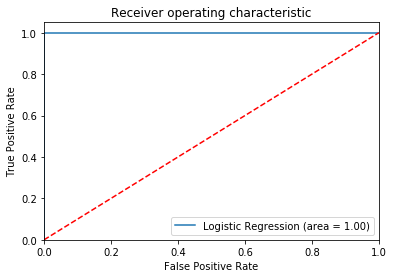

In [131]:
%matplotlib inline

import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [2]:
# Difference between probit model and logistic regression

# Basically both are linear models that have now been made nonlinear. For categorical variables

# The logit model uses something called the cumulative distribution function of the logistic distribution. 
# The probit model uses something called the cumulative distribution function of the standard normal distribution 
# to define f (*). Both functions will take any number and rescale it to fall between 0 and 1. Hence, whatever α + βx 
# equals, it can be transformed by the function to yield a predicted probability. Any function that would return a value
# between zero and one would do the trick, but there is a deeper theoretical model underpinning logit and probit that 
# requires the function to be based on a probability distribution. The logistic and standard normal cdfs turn out to be 
# convenient mathematically and are programmed into just about any general purpose statistical package.

# Random Forest Model

# A random forest mode is made of decision trees that split the data in the most efficient way into the different potential outcomes. is the building block of a random forest and is an intuitive model. We can think of a decision tree as a series of yes/no questions asked about our data eventually leading to a predicted class (or continuous value in the case of regression). This is an interpretable model because it makes classifications much like we do: we ask a sequence of queries about the available data we have until we arrive at a decision (in an ideal world).

In [133]:
# Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


No handles with labels found to put in legend.


USDIndex                  0.19
nfci                      0.13
VIX                       0.12
gdpGrowth                 0.09
ManufacturingConfidence   0.07
PeopleOutputPerHour       0.05
CorporateProfits          0.05
GDP                       0.05
HousePriceIndex           0.04
ConsumerSentiment         0.04
T10T3                     0.03
govtToGDP                 0.03
SP500                     0.03
FEDFUNDS                  0.02
USNIM                     0.02
GS10                      0.01
uRate                     0.01
dtype: float64


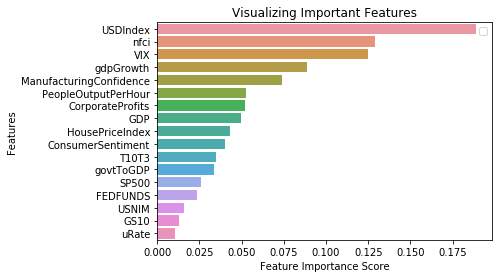

In [134]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(feature_imp)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Within the random forest model, the most important features are the USDIndex, the net financial conditions index, and the VIX

# KNN Algorithm

# A KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. In this case, it would be the values on the two highest correlated features to bear markets. Given this, we can plot these two features on a graph, and classify whether we are in a bull market or a bear market. The "NN" within KNN stands for nearest neighbors, so we decide whether a new data point added to the graph is classified as a bear market or bull market based on the points around it.

In [92]:
dataCorrelations = nnData.corr().unstack().sort_values()
dataCorrelations['bearMarket']

ManufacturingConfidence   -0.503642
uRate                     -0.029143
T10T3                      0.087757
USDIndex                   0.368988
nfci                       0.550893
bearMarket                 1.000000
dtype: float64

In [93]:
# Select the nfci and USDIndex since they are the highest correlated varibles to bear markets.    
getData = ['nfci', 'USDIndex', 'bearMarket']

KNNdata = nnData[getData] 

In [94]:
import numpy as np
from sklearn.metrics import confusion_matrix

def recallCalc(matrix):
    tp = matrix[1][1] 
    fn = matrix[0][1] 
    return(np.round(tp/(tp+fn), 5))

def precisionCalc(matrix): 
    tp = matrix[1][1] 
    fp = matrix[0][0] 
    return(np.round(tp/(tp+fp), 5))

def fScore(precision, recall):
    return(np.round(2 * (precision * recall) / (precision + recall), 5))

def falsePositiveRate_(matrix):
    fp = matrix[0][1] 
    tn = matrix[0][0] 
    return(np.round(fp/(fp+tn), 5))

def truePositiveRate_(matrix):
    tp = matrix[1][1] 
    fn = matrix[1][0] 
    return(np.round(tp/(tp+fn), 5))

def accuracy(actual, pred):
    return(np.round(  (pred == actual).sum()/len(actual)  , 5))

def thresholdPredData(threshold, pred):
    predMal = pred
    for i in range(len(predMal)):
        if((threshold == 1.0) & (predMal[i].astype(float) == 1.0)):
            predMal[i] = 0.0
        elif((threshold == 0.0) & (predMal[i].astype(float) == 0.0)):
            predMal[i] = 1.0
        elif(predMal[i] > threshold):
            predMal[i] = 1
        else:
            predMal[i] = 0
    return(predMal.astype(int))

In [95]:
def analytics(fitModel, xv_test, yv_test):
    predMal = fitModel.predict_proba(xv_test)[:, 1]
    actual = yv_test
    w, h = 5, 11;
    additionalData = [[0 for x in range(w)] for y in range(h)] 
    thresholds = np.round(np.linspace(0, 1, 11),6)
    fpr = []
    tpr = []
    for i in thresholds:
        predMal = fitModel.predict_proba(xv_test)[:, 1]
        pred = thresholdPredData(i, predMal)
        c_matrix = confusion_matrix(actual, pred)
        tpr.append(truePositiveRate_(c_matrix))
        fpr.append(falsePositiveRate_(c_matrix))
        additionalData[int(i * 10)][0] = i
        additionalData[int(i * 10)][1] = precisionCalc(c_matrix)
        additionalData[int(i * 10)][2] = recallCalc(c_matrix)
        additionalData[int(i * 10)][3] = accuracy(actual, pred)
        additionalData[int(i * 10)][4] = fScore(precisionCalc(c_matrix), recallCalc(c_matrix))
        print(c_matrix)
    additionalData = pd.DataFrame(data=additionalData, columns=['Threshold', 'Precision', 'Recall', 'Accuracy', 'fScore'])
    print(additionalData)
    df = pd.DataFrame({'threshold':thresholds, 'fpr':fpr, 'tpr':tpr})
    plt.plot(df.fpr, df.tpr)
    plt.plot([0, 90], [0, 90], '-')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.show()
    print(df)

In [178]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def predictions(train_features, test_features, train_outcome, test_outcome): 
    w, h = 5, 1;
    KNNresults = [[0 for x in range(w)] for y in range(h)] 
    KNNdatas = pd.DataFrame(KNNresults)
    KNNdatas.columns = ['a', 'b', 'c', 'd', 'e']

    for K in range(0, 5):
        K = K+1
        # ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
        # ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
        for weights in ['uniform', 'distance']:
            # ‘ball_tree’ will use BallTree, ‘kd_tree’ will use KDTree, ‘brute’ will use a brute-force search.
            for algo in ['ball_tree', 'kd_tree', 'brute']:
            # manhattan_distance (l1), and euclidean_distance (l2) for p = 2.
                for powerDistance in [1,2]:
                    model = KNeighborsClassifier(n_neighbors = K, weights=weights, algorithm=algo, p=powerDistance)
                    model.fit(train_features, train_outcome)  #fit the model
                    pred=model.predict(test_features) #make prediction on test set
                    accuracy = accuracy_score(test_outcome, pred)
                    print([[K, weights, algo, powerDistance, accuracy]])
                    thisList=[[K, weights, algo, powerDistance, accuracy]]
                    KNNdatas = KNNdatas.append((thisList))      
    KNNdatas.drop(KNNdatas.iloc[:, 1:5], inplace=True, axis=1)
    KNNdatas.drop(["a"], axis = 1, inplace = True)
    KNNdatas = KNNdatas.reset_index(drop=True)
    KNNdatas = KNNdatas.drop(KNNdatas.index[0])
    KNNdatas.columns = ['K', 'weights', 'algo', 'powerDistance', 'accuracy'] 
    print(KNNdatas)
    #print(KNNdatas['accuracy'].max())
    #print(KNNdatas['accuracy'].argmax())
    bestData = KNNdatas.iloc[KNNdatas['accuracy'].argmax() - 1]
    #print(bestData)
    from sklearn.metrics import confusion_matrix
    model = KNeighborsClassifier(n_neighbors = int(bestData.K), weights=bestData.weights, algorithm=bestData.algo, p=bestData.powerDistance)
    model.fit(train_features, train_outcome)  #fit the model
    # This is where we could do the threshold calculation
    analytics(model.fit(train_features, train_outcome), test_features, test_outcome)
    #gridshow(model, train_features, train_outcome, test_features, test_outcome, nGrid=100)
    pred=model.predict(test_features) #make prediction on test set
    #print(pred)
    accuracy = accuracy_score(test_outcome, pred)
    #print(accuracy)
    confusion_matrix(test_outcome, pred)
    return pred

[[1, 'uniform', 'ball_tree', 1, 0.9473684210526315]]
[[1, 'uniform', 'ball_tree', 2, 0.9473684210526315]]
[[1, 'uniform', 'kd_tree', 1, 0.9473684210526315]]
[[1, 'uniform', 'kd_tree', 2, 0.9473684210526315]]
[[1, 'uniform', 'brute', 1, 0.9473684210526315]]
[[1, 'uniform', 'brute', 2, 0.9473684210526315]]
[[1, 'distance', 'ball_tree', 1, 0.9473684210526315]]
[[1, 'distance', 'ball_tree', 2, 0.9473684210526315]]
[[1, 'distance', 'kd_tree', 1, 0.9473684210526315]]
[[1, 'distance', 'kd_tree', 2, 0.9473684210526315]]
[[1, 'distance', 'brute', 1, 0.9473684210526315]]
[[1, 'distance', 'brute', 2, 0.9473684210526315]]

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
ht


[[2, 'uniform', 'ball_tree', 1, 0.8947368421052632]]
[[2, 'uniform', 'ball_tree', 2, 0.8947368421052632]]
[[2, 'uniform', 'kd_tree', 1, 0.8947368421052632]]
[[2, 'uniform', 'kd_tree', 2, 0.8947368421052632]]
[[2, 'uniform', 'brute', 1, 0.8947368421052632]]
[[2, 'uniform', 'brute', 2, 0.8947368421052632]]
[[2, 'distance', 'ball_tree', 1, 0.9473684210526315]]
[[2, 'distance', 'ball_tree', 2, 0.9473684210526315]]
[[2, 'distance', 'kd_tree', 1, 0.9473684210526315]]
[[2, 'distance', 'kd_tree', 2, 0.9473684210526315]]

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
ht


[[2, 'distance', 'brute', 1, 0.9473684210526315]]
[[2, 'distance', 'brute', 2, 0.9473684210526315]]
[[3, 'uniform', 'ball_tree', 1, 0.8947368421052632]]
[[3, 'uniform', 'ball_tree', 2, 0.8947368421052632]]
[[3, 'uniform', 'kd_tree', 1, 0.8947368421052632]]
[[3, 'uniform', 'kd_tree', 2, 0.8947368421052632]]
[[3, 'uniform', 'brute', 1, 0.8947368421052632]]
[[3, 'uniform', 'brute', 2, 0.8947368421052632]]
[[3, 'distance', 'ball_tree', 1, 0.9210526315789473]]
[[3, 'distance', 'ball_tree', 2, 0.9210526315789473]]
[[3, 'distance', 'kd_tree', 1, 0.9210526315789473]]

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
ht


[[3, 'distance', 'kd_tree', 2, 0.9210526315789473]]
[[3, 'distance', 'brute', 1, 0.9210526315789473]]
[[3, 'distance', 'brute', 2, 0.9210526315789473]]
[[4, 'uniform', 'ball_tree', 1, 0.8947368421052632]]
[[4, 'uniform', 'ball_tree', 2, 0.8947368421052632]]
[[4, 'uniform', 'kd_tree', 1, 0.8947368421052632]]
[[4, 'uniform', 'kd_tree', 2, 0.8947368421052632]]
[[4, 'uniform', 'brute', 1, 0.8947368421052632]]
[[4, 'uniform', 'brute', 2, 0.8947368421052632]]
[[4, 'distance', 'ball_tree', 1, 0.9210526315789473]]
[[4, 'distance', 'ball_tree', 2, 0.9210526315789473]]


C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
ht

[[4, 'distance', 'kd_tree', 1, 0.9210526315789473]]
[[4, 'distance', 'kd_tree', 2, 0.9210526315789473]]
[[4, 'distance', 'brute', 1, 0.9210526315789473]]
[[4, 'distance', 'brute', 2, 0.9210526315789473]]
[[5, 'uniform', 'ball_tree', 1, 0.8947368421052632]]
[[5, 'uniform', 'ball_tree', 2, 0.8947368421052632]]
[[5, 'uniform', 'kd_tree', 1, 0.8947368421052632]]
[[5, 'uniform', 'kd_tree', 2, 0.8947368421052632]]
[[5, 'uniform', 'brute', 1, 0.8947368421052632]]

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
ht


[[5, 'uniform', 'brute', 2, 0.8947368421052632]]
[[5, 'distance', 'ball_tree', 1, 0.9210526315789473]]
[[5, 'distance', 'ball_tree', 2, 0.9210526315789473]]
[[5, 'distance', 'kd_tree', 1, 0.9210526315789473]]
[[5, 'distance', 'kd_tree', 2, 0.9210526315789473]]
[[5, 'distance', 'brute', 1, 0.9210526315789473]]
[[5, 'distance', 'brute', 2, 0.9210526315789473]]
      K   weights       algo  powerDistance  accuracy
1  1.00   uniform  ball_tree           1.00      0.95
2  1.00   uniform  ball_tree           2.00      0.95
3  1.00   uniform    kd_tree           1.00      0.95
4  1.00   uniform    kd_tree           2.00      0.95
5  1.00   uniform      brute           1.00      0.95
6  1.00   uniform      brute           2.00      0.95
7  1.00  distance  ball_tree           1.00      0.95
8  1.00  distance  ball_tree           2.00      0.95
9  1.00  distance    kd_tree           1.00      0.95
10 1.00  distance    kd_tree           2.00      0.95
11 1.00  distance      brute           1.00 

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
ht


[[32  0]
 [ 2  4]]
[[32  0]
 [ 2  4]]
[[32  0]
 [ 2  4]]
[[32  0]
 [ 2  4]]
[[32  0]
 [ 2  4]]
[[32  0]
 [ 2  4]]
[[32  0]
 [ 2  4]]
[[32  0]
 [ 2  4]]
[[32  0]
 [ 2  4]]
[[32  0]
 [ 6  0]]
    Threshold  Precision  Recall  Accuracy  fScore
0        0.00       1.00    0.16      0.16    0.27
1        0.10       0.11    1.00      0.95    0.20
2        0.20       0.11    1.00      0.95    0.20
3        0.30       0.11    1.00      0.95    0.20
4        0.40       0.11    1.00      0.95    0.20
5        0.50       0.11    1.00      0.95    0.20
6        0.60       0.11    1.00      0.95    0.20
7        0.70       0.11    1.00      0.95    0.20
8        0.80       0.11    1.00      0.95    0.20
9        0.90       0.11    1.00      0.95    0.20
10       1.00       0.00     nan      0.84     nan


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys


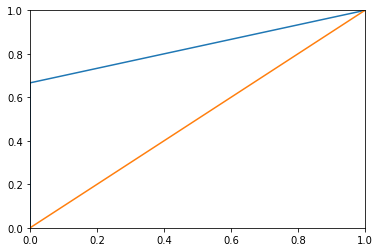

    threshold  fpr  tpr
0        0.00 1.00 1.00
1        0.10 0.00 0.67
2        0.20 0.00 0.67
3        0.30 0.00 0.67
4        0.40 0.00 0.67
5        0.50 0.00 0.67
6        0.60 0.00 0.67
7        0.70 0.00 0.67
8        0.80 0.00 0.67
9        0.90 0.00 0.67
10       1.00 0.00 0.00


In [179]:
from sklearn.model_selection import train_test_split  
train_features, test_features, train_outcome, test_outcome = train_test_split(
KNNdata.drop(['bearMarket'], axis = 1), 
    KNNdata['bearMarket'], 
    test_size = .33, 
    random_state = 7)
predictionsDataframe = pd.DataFrame(test_outcome)
predictionsDataframe['predictions'] = predictions(train_features, test_features, train_outcome, test_outcome)

# In this case on average, it seems that 1 neighbor was the most accurate classifier at ~95% 